<a href="https://colab.research.google.com/github/AI-Junction/Lung-Cancer-Detection/blob/master/LungCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle

In [4]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

#filename = "/content/.kaggle/kaggle.json"
#filename = "/.kaggle/kaggle.json"
filename = "kaggle.json"
#os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [5]:
!ls -lha kaggle.json

---x-wx--T 1 root root 65 Jan 19 05:12 kaggle.json


In [6]:
os.path.isdir("/root/.kaggle")

False

In [7]:
dir_kaggle = "/root/.kaggle"
if not os.path.isdir(dir_kaggle):
  !mkdir -p ~/.kaggle  
!cp kaggle.json ~/.kaggle/
os.path.isdir(dir_kaggle)

True

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
! pip install dicom

    100% |████████████████████████████████| 768kB 23.6MB/s 


In [0]:
import glob

In [0]:
import seaborn as sns
p = sns.color_palette()

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt

from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection



#dsb_data_dir = "drive/My Drive/All ML Datasets/AllLuna16Data"

/usr/local/lib/python3.6/dist-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [0]:
!cp -r '/content/drive/My Drive/All ML Datasets/AllLuna16Data' '/content/'

In [0]:
dsb_data_dir = "/content/AllLuna16Data"

In [0]:
def plot_3d(image, threshold=-300):

    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    #p = first_patient_pixels.transpose(2,1,0)
    
    p = pix_resampled.transpose(2,1,0)
    verts, faces, norm, val  = measure.marching_cubes(p, threshold)
    
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    
    plt.show()


In [0]:
def largest_label_volume(im, bg=-1):
    vals, counts = np.unique(im, return_counts=True)

    counts = counts[vals != bg]
    vals = vals[vals != bg]

    if len(counts) > 0:
        return vals[np.argmax(counts)]
    else:
        return None


In [20]:
#INPUT_FOLDER = os.getcwd()
#print(INPUT_FOLDER)
path = os.path.join(dsb_data_dir, "R_004/06-30-1997-Diagnostic Pre-Surgery Contrast Enhanced CT-71813/3- NONE -29295")
patients = os.listdir(path)
print(patients)
patients.sort()


['000000.dcm', '000017.dcm', '000050.dcm', '000030.dcm', '000049.dcm', '000024.dcm', '000035.dcm', '000059.dcm', '000044.dcm', '000055.dcm', '000058.dcm', '000022.dcm', '000014.dcm', '000010.dcm', '000019.dcm', '000027.dcm', '000038.dcm', '000056.dcm', '000067.dcm', '000062.dcm', '000048.dcm', '000042.dcm', '000037.dcm', '000023.dcm', '000043.dcm', '000004.dcm', '000005.dcm', '000047.dcm', '000045.dcm', '000029.dcm', '000034.dcm', '000012.dcm', '000054.dcm', '000026.dcm', '000039.dcm', '000009.dcm', '000036.dcm', '000013.dcm', '000020.dcm', '000008.dcm', '000002.dcm', '000033.dcm', '000003.dcm', '000065.dcm', '000015.dcm', '000032.dcm', '000007.dcm', '000016.dcm', '000001.dcm', '000066.dcm', '000060.dcm', '000021.dcm', '000063.dcm', '000053.dcm', '000041.dcm', '000011.dcm', '000031.dcm', '000046.dcm', '000051.dcm', '000025.dcm', '000040.dcm', '000052.dcm', '000028.dcm', '000061.dcm', '000057.dcm', '000006.dcm', '000064.dcm', '000018.dcm']


In [18]:
dcm = path+'/000009.dcm'
print('Filename: {}'.format(dcm))
dcm = dicom.read_file(dcm)

Filename: /content/AllLuna16Data/R_004/06-30-1997-Diagnostic Pre-Surgery Contrast Enhanced CT-71813/3- NONE -29295/000009.dcm


In [19]:
dcm

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '19970630'
(0008, 0013) Instance Creation Time              TM: '170124'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4320.5030.211533171767363769404037219351
(0008, 0020) Study Date                          DA: '19970630'
(0008, 0021) Series Date                         DA: '19970630'
(0008, 0022) Acquisition Date                    DA: '19970630'
(0008, 0023) Content Date                        DA: '19970630'
(0008, 0030) Study Time                          TM: '165846.0000'
(0008, 0031) Series Time                         TM: '170035.0000'
(0008, 0032) Acquisition Time                    TM: '170054'
(0008, 0033) Content Time                        TM: '170124'
(0008, 0050) Accessi

In [20]:
img = dcm.pixel_array
img[img == -2000] = 0

plt.axis('off')
plt.imshow(img)
plt.show()

plt.axis('off')
plt.imshow(-img) # Invert colors with -
plt.show()

In [0]:
def dicom_to_image(filename):
    dcm = dicom.read_file(filename)
    img = dcm.pixel_array
    img[img == -2000] = 0
    return img

In [0]:
files = glob.glob(path + '/*.dcm')

In [23]:
f, plots = plt.subplots(4, 5, sharex='col', sharey='row', figsize=(10, 8))
for i in range(20):
    plots[i // 5, i % 5].axis('off')
    plots[i // 5, i % 5].imshow(dicom_to_image(np.random.choice(files)), cmap=plt.cm.bone)

In [0]:
def get_slice_location(dcm):
    return float(dcm[0x0020, 0x1041].value)

In [0]:
# Returns a list of images for that patient_id, in ascending order of Slice Location
def load_patient(patient_id):
    #files = glob.glob('../input/sample_images/{}/*.dcm'.format(patient_id))
    files = glob.glob(path+'/*.dcm')
    imgs = {}
    for f in files:
        dcm = dicom.read_file(f)
        img = dcm.pixel_array
        img[img == -2000] = 0
        sl = get_slice_location(dcm)
        imgs[sl] = img
        
    # Not a very elegant way to do this
    sorted_imgs = [x[1] for x in sorted(imgs.items(), key=lambda x: x[0])]
    return sorted_imgs

In [0]:
pat = load_patient('')

IndexError: ignored

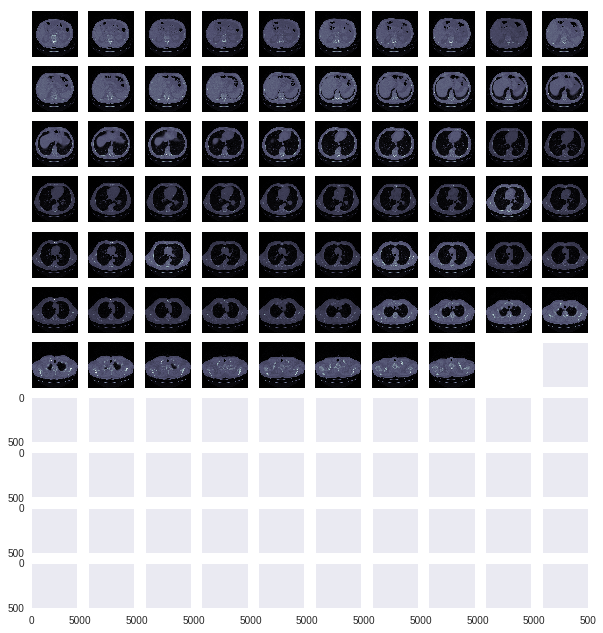

In [27]:
f, plots = plt.subplots(11, 10, sharex='all', sharey='all', figsize=(10, 11))
# matplotlib is drunk
#plt.title('Sorted Slices of Patient 0a38e7597ca26f9374f8ea2770ba870d - No cancer')
for i in range(110):
    plots[i // 10, i % 10].axis('off')
    plots[i // 10, i % 10].imshow(pat[i], cmap=plt.cm.bone)

IndexError: ignored

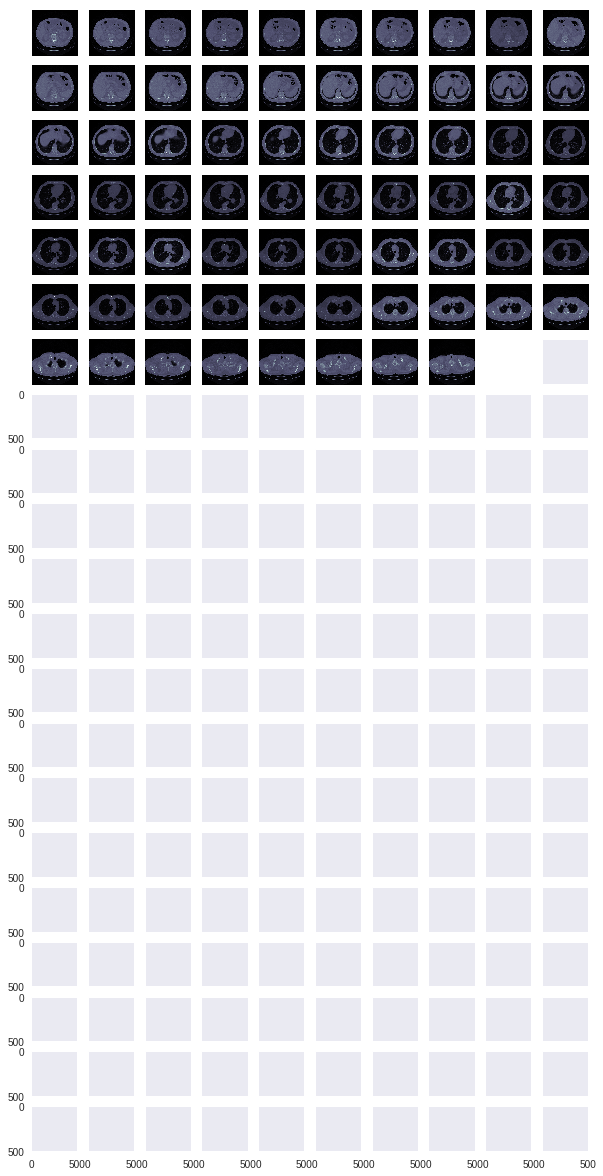

In [28]:
pat = load_patient('0acbebb8d463b4b9ca88cf38431aac69')
f, plots = plt.subplots(21, 10, sharex='all', sharey='all', figsize=(10, 21))
for i in range(203):
    plots[i // 10, i % 10].axis('off')
    plots[i // 10, i % 10].imshow(pat[i], cmap=plt.cm.bone)

In [0]:
# This function takes in a single frame from the DICOM and returns a single frame in RGB format.
def normalise(img):
    normed = (img / 14).astype(np.uint8) # Magic number, scaling to create int between 0 and 255
    img2 = np.zeros([*img.shape, 3], dtype=np.uint8)
    for i in range(3):
        img2[:, :, i] = normed
    return img2

In [0]:
npat = [normalise(p) for p in pat]

In [0]:
pat = load_patient('0acbebb8d463b4b9ca88cf38431aac69')

In [38]:
!sudo apt build-dep imagemagick
!sudo add-apt-repository ppa:mc3man/trusty-media
!sudo apt-get install ffmpeg gstreamer0.10-ffmpeg
!sudo apt-get install libav-tools
#!apt install ffmpeg

Reading package lists... Done
E: You must put some 'source' URIs in your sources.list
 Upgraded, advanced or not normally available multimedia packages for Trusty
Xenial users go here - https://launchpad.net/~mc3man/+archive/ubuntu/xerus-media

*Please note that if using this ppa I would *not* try upgrading to 14.10/15.04, ect. Do a fresh install instead. The intent here is just for users wishing to stay on 14.04*

If upgrading releases anyway use ppa-purge *First* -
sudo ppa-purge  ppa:mc3man/trusty-media

Also note that using this ppa then disabling may cause issue for installing i386 packages like used by wine. So once enabled leave enabled or purge before removing.

Additionally if using apt-get * sudo  apt-get dist-upgrade will be needed* at times.(pay attention).  Otherwise package managers may be ok.

So typically to enable & first use -
sudo add-apt-repository ppa:mc3man/trusty-media
sudo apt-get update
sudo apt-get dist-upgrade

A few notes:
gstreamer0.10-ffmpeg - needed for s

In [33]:
#!sudo apt-get install imagemagick


Reading package lists... Done
E: You must put some 'source' URIs in your sources.list


In [34]:
#!pip install wand

    100% |████████████████████████████████| 102kB 4.6MB/s 


MovieWriter imagemagick unavailable. Trying to use pillow instead.


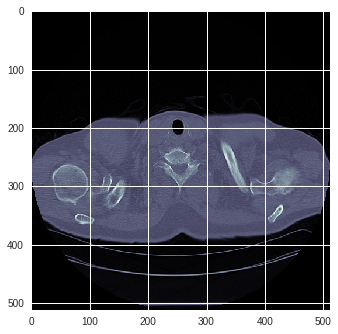

In [39]:
import matplotlib.animation as animation
def animate(pat, gifname):
    # Based on @Zombie's code
    fig = plt.figure()
    anim = plt.imshow(pat[0], cmap=plt.cm.bone)
    def update(i):
        anim.set_array(pat[i])
        return anim,
    
    a = animation.FuncAnimation(fig, update, frames=range(len(pat)), interval=50, blit=True)
    a.save(gifname, writer='imagemagick')
    #a.save('the_movie.mp4', writer = 'mencoder', fps=15)
    
animate(pat, 'test.gif')

In [0]:
slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
y = [x.ImagePositionPatient for x in slices]
print(y)

print(len(slices))



[['-209.400', '-223.900', '-56.750'], ['-209.400', '-223.900', '-331.750'], ['-209.400', '-223.900', '-51.750'], ['-209.400', '-223.900', '-121.750'], ['-209.400', '-223.900', '-266.750'], ['-209.400', '-223.900', '-11.750'], ['-209.400', '-223.900', '-186.750'], ['-209.400', '-223.900', '-326.750'], ['-209.400', '-223.900', '-71.750'], ['-209.400', '-223.900', '-271.750'], ['-209.400', '-223.900', '-226.750'], ['-209.400', '-223.900', '-111.750'], ['-209.400', '-223.900', '-171.750'], ['-209.400', '-223.900', '-241.750'], ['-209.400', '-223.900', '-276.750'], ['-209.400', '-223.900', '-216.750'], ['-209.400', '-223.900', '-191.750'], ['-209.400', '-223.900', '-311.750'], ['-209.400', '-223.900', '-36.750'], ['-209.400', '-223.900', '-136.750'], ['-209.400', '-223.900', '-301.750'], ['-209.400', '-223.900', '-156.750'], ['-209.400', '-223.900', '-116.750'], ['-209.400', '-223.900', '-66.750'], ['-209.400', '-223.900', '-131.750'], ['-209.400', '-223.900', '-151.750'], ['-209.400', '-22

In [0]:
print("look at attributes of slices")
print("============================")
q = [x for x in dir(slices)]
print(dir(slices))

print("\n look at attributes of individual slice")
print("============================")
print([y for y in dir(slices[0])])

print('AcquisitionNumber',slices[0].AcquisitionNumber)
print('BitsAllocated',slices[0].BitsAllocated)
print('BitsStored',slices[0].BitsStored)
print('Columns',slices[0].Columns)
print('FrameOfReferenceUID', slices[0].FrameOfReferenceUID)
print('HighBit',slices[0].HighBit)
print('ImageOrientationPatient',slices[0].ImageOrientationPatient)
print('ImagePositionPatient',slices[0].ImagePositionPatient)
print('InstanceNumber',slices[0].InstanceNumber)
print('KVP',slices[0].KVP)
print('Modality',slices[0].Modality)
print('PatientBirthDate',slices[0].PatientBirthDate)
print('PatientID',slices[0].PatientID)
print('PatientName',slices[0].PatientName)
print('PatientOrientation',slices[0].PatientOrientation)
print('PhotometricInterpretation',slices[0].PhotometricInterpretation)
print('PixelData length',len(slices[0].PixelData))
print('PixelPaddingValue',slices[0].PixelPaddingValue)
print('PixelRepresentation',slices[0].PixelRepresentation)
print('PixelSpacing',slices[0].PixelSpacing)
print('PositionReferenceIndicator',slices[0].PositionReferenceIndicator)
print('RescaleIntercept',slices[0].RescaleIntercept)
print('RescaleSlope',slices[0].RescaleSlope)
print('Rows',slices[0].Rows)
print('SOPClassUID',slices[0].SOPClassUID)
print('SOPInstanceUID',slices[0].SOPInstanceUID)
print('SamplesPerPixel',slices[0].SamplesPerPixel)
print('SeriesDescription',slices[0].SeriesDescription)
print('SeriesInstanceUID',slices[0].SeriesInstanceUID)
print('SeriesNumber',slices[0].SeriesNumber)
print('SliceLocation',slices[0].SliceLocation)
print('SpecificCharacterSet',slices[0].SpecificCharacterSet)
print('StudyInstanceUID',slices[0].StudyInstanceUID)
print('WindowCenter',slices[0].WindowCenter)
print('WindowWidth',slices[0].WindowWidth)


look at attributes of slices
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']

 look at attributes of individual slice
['AccessionNumber', 'AcquisitionDate', 'AcquisitionNumber', 'AcquisitionTime', 'AdditionalPatientHistory', 'AdmittingDiagnosesDescription', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate', 'ContentTime', 'ConvolutionKernel', 'DataCollectionDiameter', 'DeidentificationMethod', 'DeidentificationMethodCodeSequence', 'DerivationDescription',

In [0]:
slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
try:
    slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
except:
    slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)


In [0]:
for s in slices:
        s.SliceThickness = slice_thickness
        
first_patient = slices

print(slices[0])

print(slices[0].pixel_array.shape)


(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '19970630'
(0008, 0013) Instance Creation Time              TM: '170139'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4320.5030.301588093915295674168880116065
(0008, 0020) Study Date                          DA: '19970630'
(0008, 0021) Series Date                         DA: '19970630'
(0008, 0022) Acquisition Date                    DA: '19970630'
(0008, 0023) Content Date                        DA: '19970630'
(0008, 0030) Study Time                          TM: '165846.0000'
(0008, 0031) Series Time                         TM: '170035.0000'
(0008, 0032) Acquisition Time                    TM: '170054'
(0008, 0033) Content Time                        TM: '170139'
(0008, 0050) Accessi

In [0]:
image = np.stack([s.pixel_array for s in slices])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
image[image == -2000] = 0


In [0]:
    # Convert to Hounsfield units (HU)
for slice_number in range(len(slices)):
        
    intercept = slices[slice_number].RescaleIntercept
    slope = slices[slice_number].RescaleSlope
        
    if slope != 1:
        image[slice_number] = slope * image[slice_number].astype(np.float64)
        image[slice_number] = image[slice_number].astype(np.int16)
            
    image[slice_number] += np.int16(intercept)


In [0]:
first_patient_pixels = np.array(image, dtype=np.int16)


f, ax = plt.subplots(10,5, figsize=(25,25))

axes = ax.flat

for i, x in enumerate(axes):
    x.imshow(first_patient_pixels[i-1], cmap=plt.cm.gray)
    x.axis("off")

plt.show()


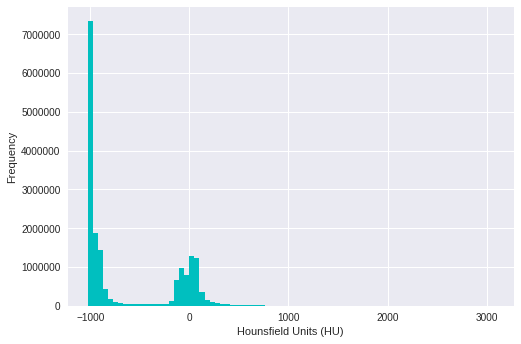

In [0]:
fig = plt.figure()
plt.hist(first_patient_pixels.flatten(), bins=80, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()


In [0]:
# Show some slice in the middle
fig = plt.figure()
plt.imshow(first_patient_pixels[67], cmap=plt.cm.gray)
plt.show()


In [0]:
print(first_patient[0].SliceThickness)

print(first_patient[0].PixelSpacing)

print(first_patient_pixels.shape)



print(len(first_patient))
print(first_patient[0].pixel_array.shape)
print(type(first_patient))

print(len(first_patient_pixels))
print(first_patient_pixels.shape)
print(type(first_patient_pixels))


5.0
['0.830078', '0.830078']
(68, 512, 512)
68
(512, 512)
<class 'list'>
68
(68, 512, 512)
<class 'numpy.ndarray'>


In [0]:
image = first_patient_pixels
scan = first_patient
new_spacing=[1,1,1]


spacing = np.hstack([[first_patient[0].SliceThickness], first_patient[0].PixelSpacing])
spacing = np.array(spacing, dtype=np.float32)
print(spacing)
print(type(spacing))

resize_factor = spacing / new_spacing
print(resize_factor, spacing, new_spacing)


new_real_shape = image.shape * resize_factor
print(new_real_shape)


new_shape = np.round(new_real_shape)
print(new_shape)

real_resize_factor = new_shape / image.shape
print(real_resize_factor)


new_spacing = spacing / real_resize_factor
print(new_spacing)


image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
pix_resampled, spacing = image, new_spacing


print(pix_resampled.shape)
print(spacing)


print("Shape before resampling\t", first_patient_pixels.shape)
print("Shape after resampling\t", pix_resampled.shape)


[5.       0.830078 0.830078]
<class 'numpy.ndarray'>
[5.         0.83007801 0.83007801] [5.       0.830078 0.830078] [1, 1, 1]
[340.         424.99993896 424.99993896]
[340. 425. 425.]
[5.         0.83007812 0.83007812]
[1.         0.99999986 0.99999986]
(340, 425, 425)
[1.         0.99999986 0.99999986]
Shape before resampling	 (68, 512, 512)
Shape after resampling	 (340, 425, 425)


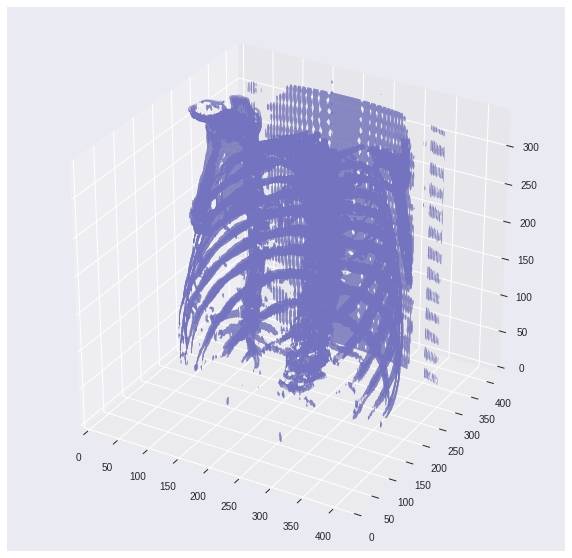

In [0]:
plot_3d(pix_resampled, 400)    

In [0]:
image = pix_resampled
print(np.unique(image))
fill_lung_structures=True
# not actually binary, but 1 and 2. 
# 0 is treated as background, which we do not want
binary_image = np.array(image > -320, dtype=np.int8)+1
print(binary_image.shape)
print(image.shape)




In [0]:
print(np.unique(binary_image))
print(np.unique(image))


labels = measure.label(binary_image)
print(len([x.shape for x in labels]))

print(len(np.unique(labels)))
#print(labels[1,1,1])
print(binary_image[labels == 100])
    
# Pick the pixel in the very corner to determine which label is air.
#   Improvement: Pick multiple background labels from around the patient
#   More resistant to "trays" on which the patient lays cutting the air 
#   around the person in half
background_label = labels[0,0,0]
print(background_label)

    
#Fill the air around the person
binary_image[background_label == labels] = 2
z = measure.label(binary_image)
print(len(np.unique(z)))
print(binary_image[z == 100])
    



In [0]:
for i, x in enumerate(binary_image):
    print(i,x.shape)
    print(np.unique(measure.label(x-1), return_counts=True))
    #print(measure.label(x-1)[0].shape)
    #print(measure.label(x-1)[1].shape)
    
    
    


In [0]:
# Method of filling the lung structures (that is superior to something like 
# morphological closing)
if fill_lung_structures:
    # For every slice we determine the largest solid structure
    for i, axial_slice in enumerate(binary_image):
        axial_slice = axial_slice - 1
        labeling = measure.label(axial_slice)

        #####
        im = labeling
        bg = 0
        vals, counts = np.unique(im, return_counts=True)
        print(vals,counts)
        counts = counts[vals != bg]
        vals = vals[vals != bg]

        if len(counts) > 0:
            l_max = vals[np.argmax(counts)]
        else:
            l_max = None        
        
        #####
        
        if l_max is not None: #This slice contains some lung
            binary_image[i][labeling != l_max] = 1

    


In [0]:
binary_image -= 1 #Make the image actual binary
binary_image = 1-binary_image # Invert it, lungs are now 1
    
# Remove other air pockets insided body
labels = measure.label(binary_image, background=0)
l_max = largest_label_volume(labels, bg=0)
if l_max is not None: # There are air pockets
    binary_image[labels != l_max] = 0
 
segmented_lungs = binary_image


plot_3d(segmented_lungs, 0)








In [0]:
def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices





In [0]:
def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):
        
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
        
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)







In [0]:
def resample(image, scan, new_spacing=[1,1,1]):
    # Determine current pixel spacing
    #spacing = np.array(np.array(scan[0].SliceThickness) + np.array(scan[0].PixelSpacing[0]), dtype=np.float32)

    spacing = np.hstack([[scan[0].SliceThickness], scan[0].PixelSpacing])
    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor
    
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
    
    return image, new_spacing



pix_resampled, spacing = resample(first_patient_pixels, first_patient, [1,1,1])
print("Shape before resampling\t", first_patient_pixels.shape)
print("Shape after resampling\t", pix_resampled.shape)




    
    






In [0]:
def segment_lung_mask(image, fill_lung_structures=True):
    
    # not actually binary, but 1 and 2. 
    # 0 is treated as background, which we do not want
    binary_image = np.array(image > -320, dtype=np.int8)+1
    labels = measure.label(binary_image)
    
    # Pick the pixel in the very corner to determine which label is air.
    #   Improvement: Pick multiple background labels from around the patient
    #   More resistant to "trays" on which the patient lays cutting the air 
    #   around the person in half
    background_label = labels[0,0,0]
    
    #Fill the air around the person
    binary_image[background_label == labels] = 2
    
    
    # Method of filling the lung structures (that is superior to something like 
    # morphological closing)
    if fill_lung_structures:
        # For every slice we determine the largest solid structure
        for i, axial_slice in enumerate(binary_image):
            axial_slice = axial_slice - 1
            labeling = measure.label(axial_slice)
            l_max = largest_label_volume(labeling, bg=0)
            
            if l_max is not None: #This slice contains some lung
                binary_image[i][labeling != l_max] = 1

    
    binary_image -= 1 #Make the image actual binary
    binary_image = 1-binary_image # Invert it, lungs are now 1
    
    # Remove other air pockets insided body
    labels = measure.label(binary_image, background=0)
    l_max = largest_label_volume(labels, bg=0)
    if l_max is not None: # There are air pockets
        binary_image[labels != l_max] = 0
 
    return binary_image



In [0]:
segmented_lungs = segment_lung_mask(pix_resampled, False)
segmented_lungs_fill = segment_lung_mask(pix_resampled, True)


plot_3d(segmented_lungs_fill, 0)
plot_3d(segmented_lungs_fill - segmented_lungs, 0)






In [21]:
lung = dicom.read_file(path+'/000030.dcm')

slice = lung.pixel_array
slice[slice == -2000] = 0
plt.imshow(slice, cmap=plt.cm.gray)

In [0]:
def read_ct_scan(folder_name):
        # Read the slices from the dicom file
        slices = [dicom.read_file(folder_name + filename) for filename in os.listdir(folder_name)]
        
        # Sort the dicom slices in their respective order
        slices.sort(key=lambda x: int(x.InstanceNumber))
        
        # Get the pixel values for all the slices
        slices = np.stack([s.pixel_array for s in slices])
        slices[slices == -2000] = 0
        return slices

In [24]:
print("R_004/06-30-1997-Diagnostic Pre-Surgery Contrast Enhanced CT-71813/3- NONE -29295")

R_004/06-30-1997-Diagnostic Pre-Surgery Contrast Enhanced CT-71813/3- NONE -29295


In [25]:
print(path)

/content/AllLuna16Data/R_004/06-30-1997-Diagnostic Pre-Surgery Contrast Enhanced CT-71813/3- NONE -29295


In [0]:
ct_scan = read_ct_scan(path+'/') 

In [0]:
def plot_ct_scan(scan):
    f, plots = plt.subplots(int(scan.shape[0] / 20) + 1, 4, figsize=(25, 25))
    for i in range(0, scan.shape[0], 5):
        plots[int(i / 20), int((i % 20) / 5)].axis('off')
        plots[int(i / 20), int((i % 20) / 5)].imshow(scan[i], cmap=plt.cm.bone) 

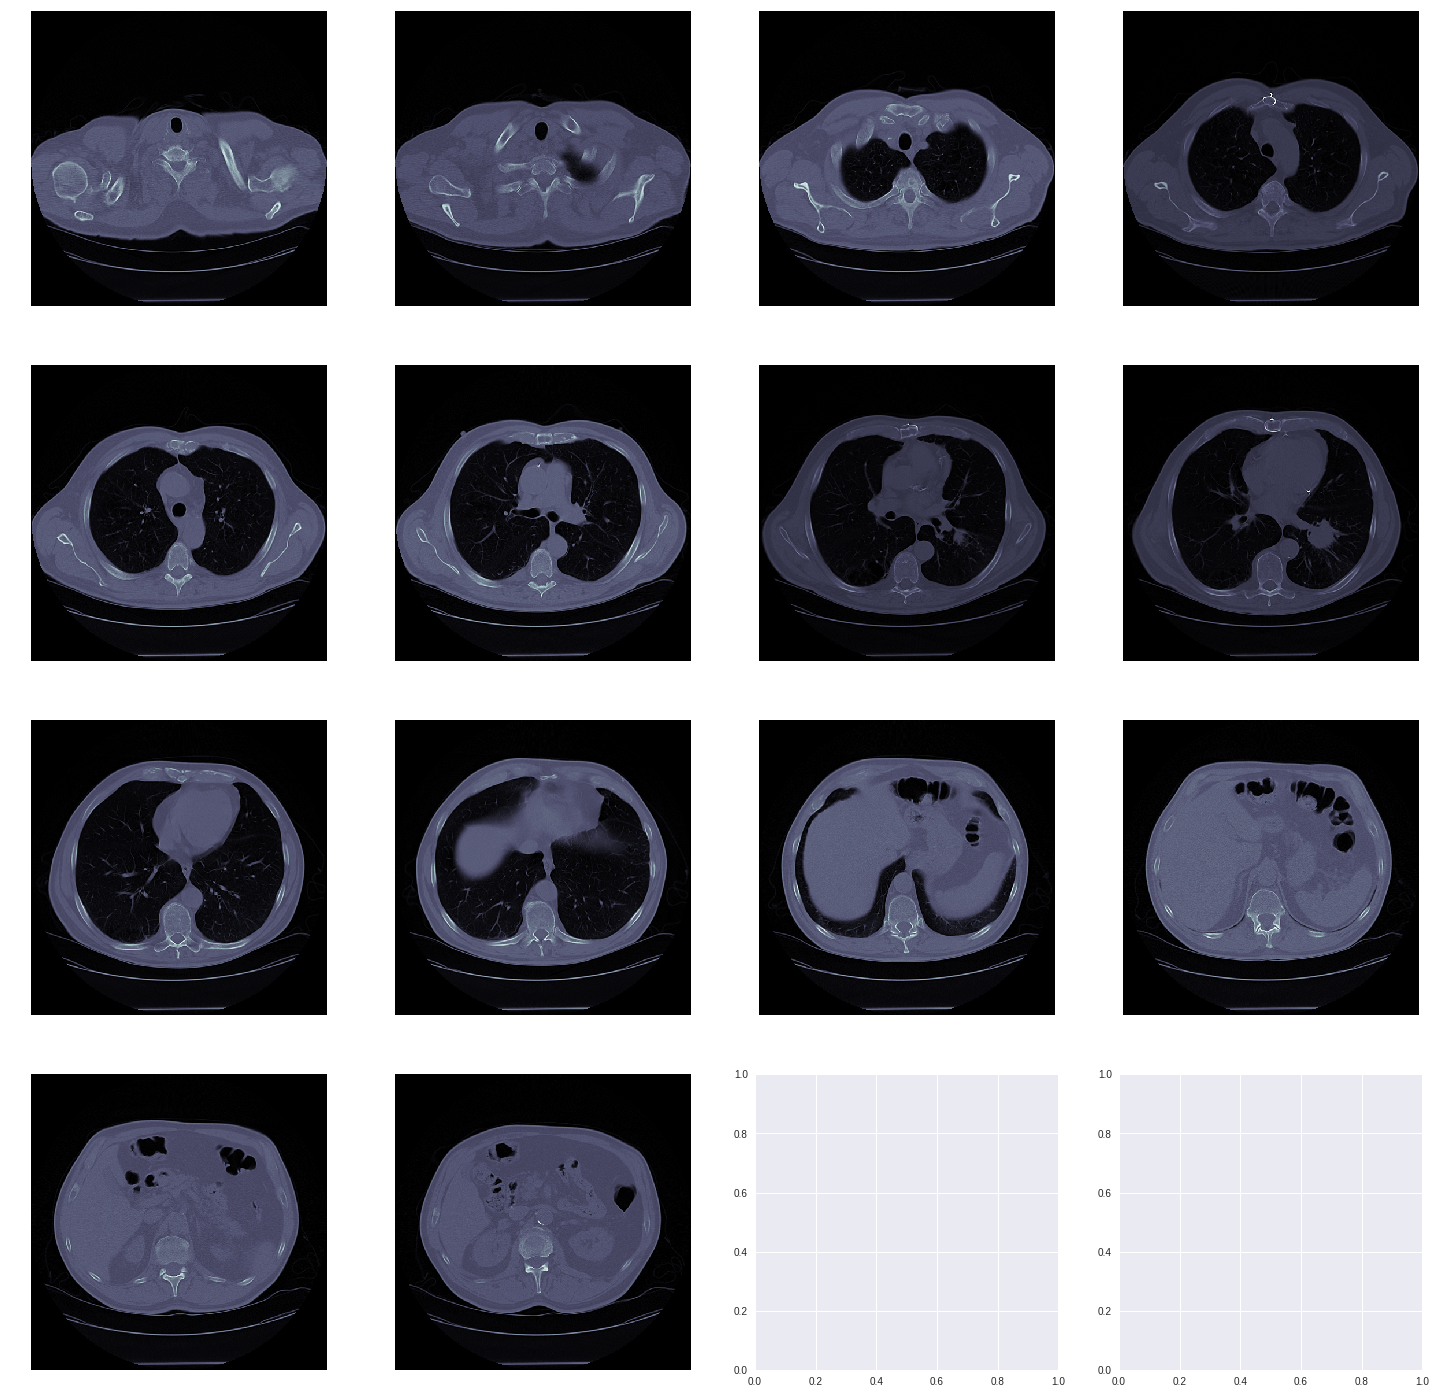

In [28]:
plot_ct_scan(ct_scan)

In [0]:
from skimage.segmentation import clear_border
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.filters import roberts, sobel
from scipy import ndimage as ndi

def get_segmented_lungs(im, plot=False):
    
    '''
    This funtion segments the lungs from the given 2D slice.
    '''
    if plot == True:
        f, plots = plt.subplots(8, 1, figsize=(5, 40))
    '''
    Step 1: Convert into a binary image. 
    '''
    binary = im < 604
    if plot == True:
        plots[0].axis('off')
        plots[0].imshow(binary, cmap=plt.cm.bone) 
    '''
    Step 2: Remove the blobs connected to the border of the image.
    '''
    cleared = clear_border(binary)
    if plot == True:
        plots[1].axis('off')
        plots[1].imshow(cleared, cmap=plt.cm.bone) 
    '''
    Step 3: Label the image.
    '''
    label_image = label(cleared)
    if plot == True:
        plots[2].axis('off')
        plots[2].imshow(label_image, cmap=plt.cm.bone) 
    '''
    Step 4: Keep the labels with 2 largest areas.
    '''
    areas = [r.area for r in regionprops(label_image)]
    areas.sort()
    if len(areas) > 2:
        for region in regionprops(label_image):
            if region.area < areas[-2]:
                for coordinates in region.coords:                
                       label_image[coordinates[0], coordinates[1]] = 0
    binary = label_image > 0
    if plot == True:
        plots[3].axis('off')
        plots[3].imshow(binary, cmap=plt.cm.bone) 
    '''
    Step 5: Erosion operation with a disk of radius 2. This operation is 
    seperate the lung nodules attached to the blood vessels.
    '''
    selem = disk(2)
    binary = binary_erosion(binary, selem)
    if plot == True:
        plots[4].axis('off')
        plots[4].imshow(binary, cmap=plt.cm.bone) 
    '''
    Step 6: Closure operation with a disk of radius 10. This operation is 
    to keep nodules attached to the lung wall.
    '''
    selem = disk(10)
    binary = binary_closing(binary, selem)
    if plot == True:
        plots[5].axis('off')
        plots[5].imshow(binary, cmap=plt.cm.bone) 
    '''
    Step 7: Fill in the small holes inside the binary mask of lungs.
    '''
    edges = roberts(binary)
    binary = ndi.binary_fill_holes(edges)
    if plot == True:
        plots[6].axis('off')
        plots[6].imshow(binary, cmap=plt.cm.bone) 
    '''
    Step 8: Superimpose the binary mask on the input image.
    '''
    get_high_vals = binary == 0
    im[get_high_vals] = 0
    if plot == True:
        plots[7].axis('off')
        plots[7].imshow(im, cmap=plt.cm.bone) 
        
    return im

In [45]:
get_segmented_lungs(ct_scan[30], True)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)